## Importing Requirments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE

## Explaratory Data Analysis EDA

In [3]:
dataset = pd.read_csv('/content/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


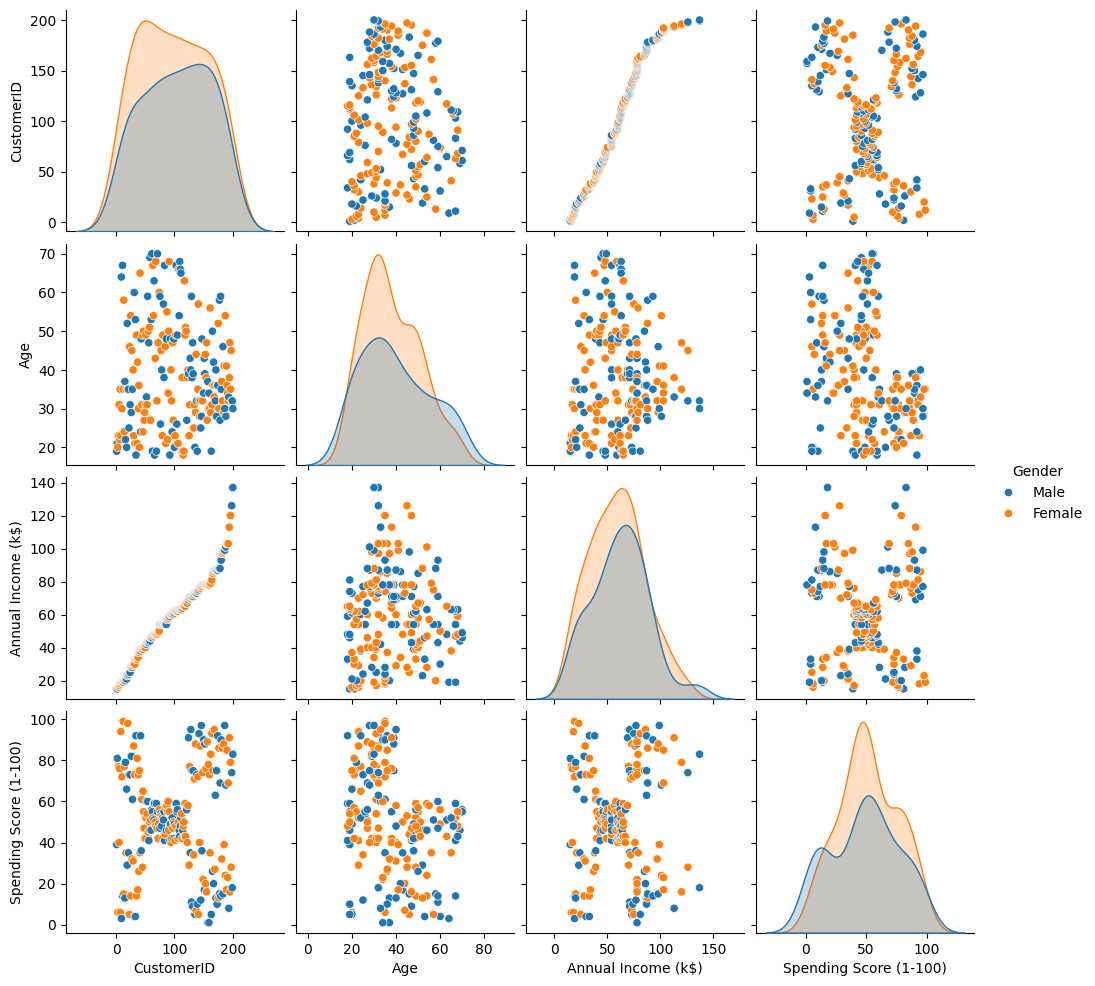

In [4]:
sns.pairplot(data=dataset, hue='Gender')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.drop('CustomerID', axis=1, inplace=True)

In [7]:
dataset.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<Axes: xlabel='Age', ylabel='Count'>

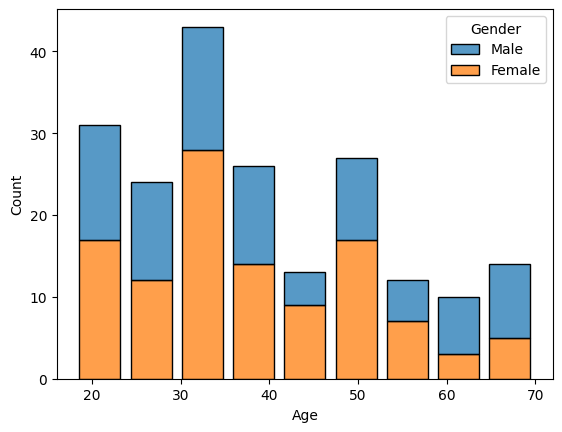

In [9]:
sns.histplot(data=dataset, x='Age', hue='Gender', multiple='stack', shrink=.8)

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

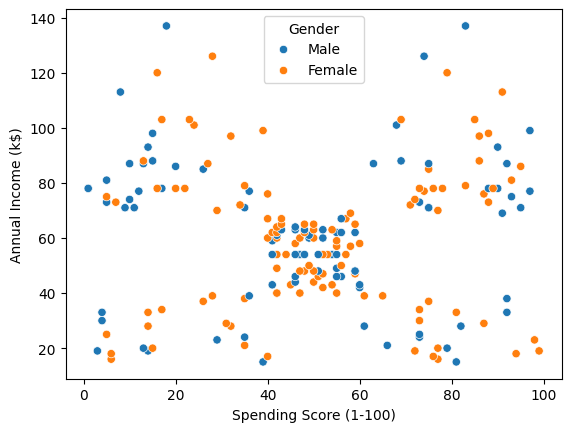

In [10]:
sns.scatterplot(data=dataset, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender')

<Axes: >

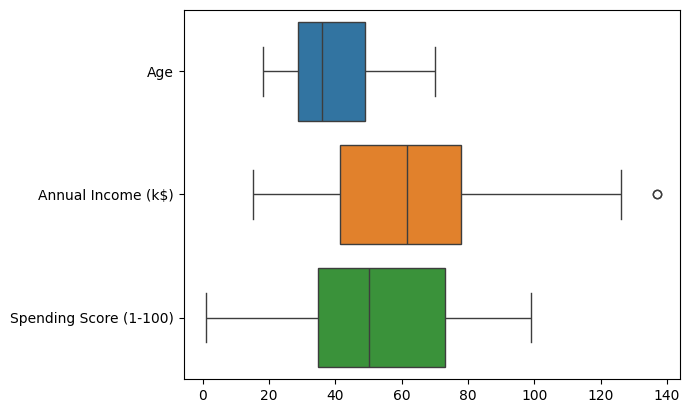

In [11]:
sns.boxplot(data=dataset, orient='h')

<Axes: >

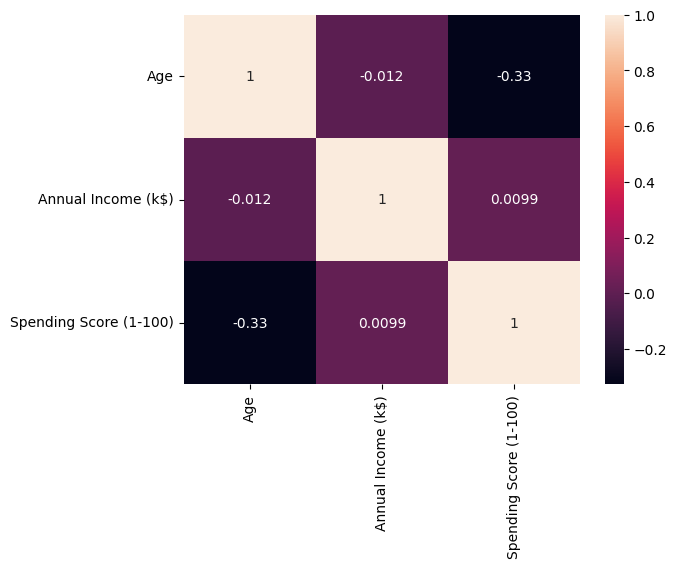

In [12]:
sns.heatmap(data=dataset.corr(numeric_only=True), annot=True)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
X = dataset[['Spending Score (1-100)', 'Annual Income (k$)']].values
X

## Clustring Model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

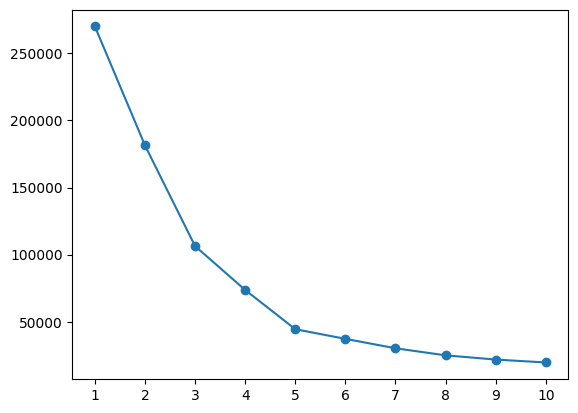

In [15]:
# check for the best number of clusters
inert = []
ks = range(1,11)
for i in ks:
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    inert.append(km.inertia_)

plt.plot(ks, inert, '-o')
plt.xticks(ks)
plt.show()

In [16]:
scaler = MinMaxScaler()
kmeans_model = KMeans(n_clusters=5)
pipeline = make_pipeline(scaler, kmeans_model)
pipeline.fit(X)
labels = pipeline.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


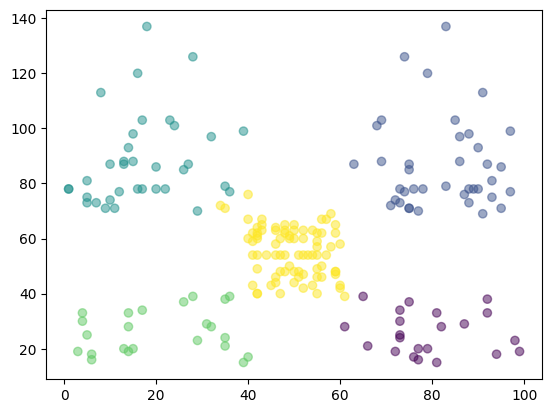

In [28]:
Xs = X[:,0]
ys = X[:,1]
plt.scatter(Xs,ys, c=labels, alpha=.5)
plt.show()

In [18]:
centers = kmeans_model.cluster_centers_
centers

array([[0.79962894, 0.08792846],
       [0.82783883, 0.58638083],
       [0.16443149, 0.6       ],
       [0.20319432, 0.09265859],
       [0.49508692, 0.33029751]])

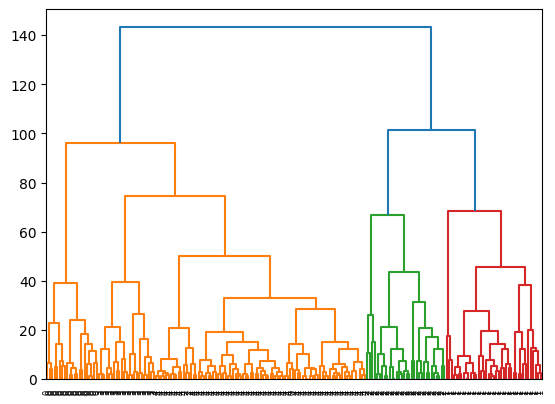

In [22]:
merg = linkage(X,method= 'complete')
dendrogram(merg, labels=labels, leaf_rotation=90, leaf_font_size=6)
plt.show()

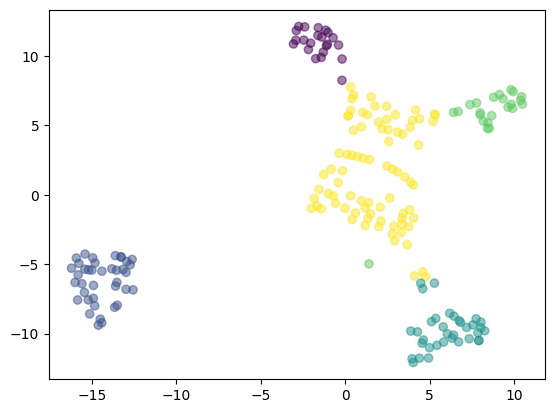

In [23]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(X)
Xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(Xs, ys, c=labels, alpha=.5)
plt.show()